In [1]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## neural network library
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Info for missing value and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# View some statistical details
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Data cleaning
column_name = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replace O with NaN
df[column_name] = df[column_name].replace(0, np.nan)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
# Checking for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

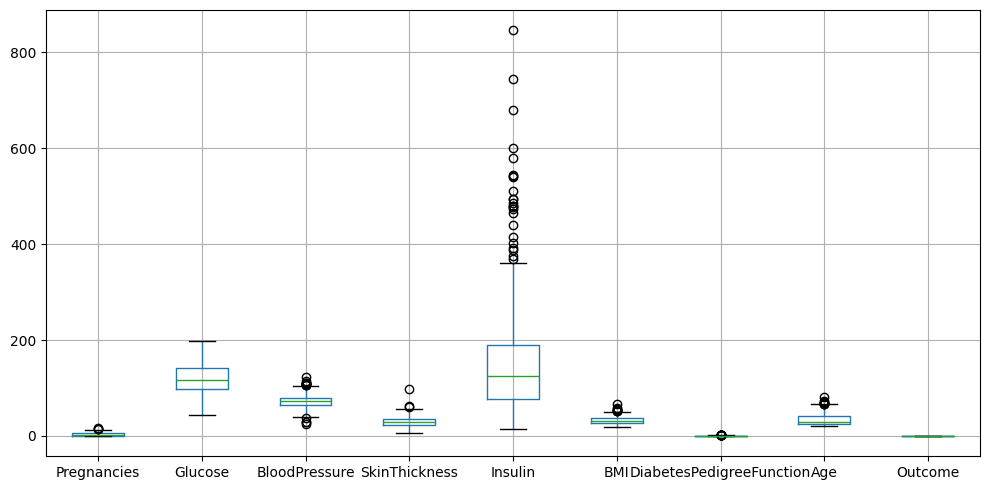

In [8]:
# Boxplot

df.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

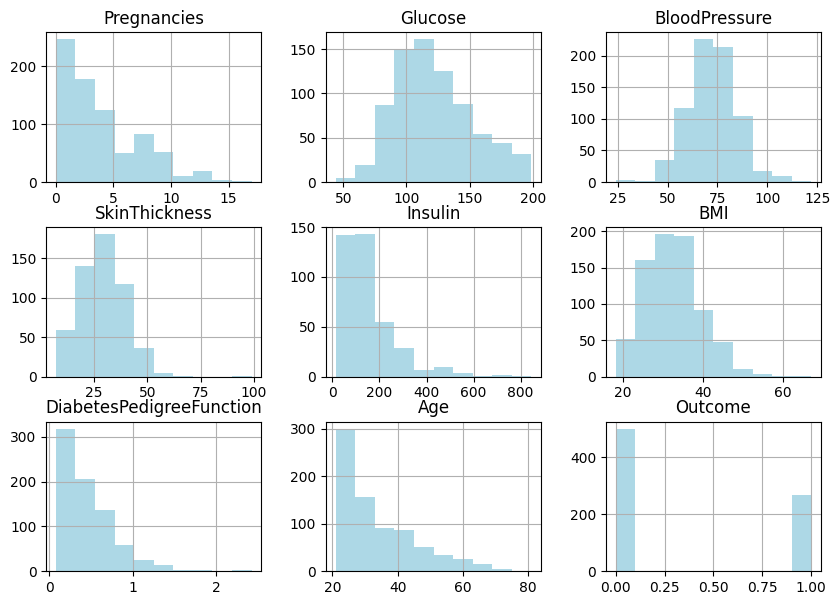

In [9]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

In [10]:
# Filling glucose, bloodpressure with mean
# FIlling skinthickness and insulin, BMI with median (skewed or outliers)
# Use fillna function

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['Glucose'].fillna(df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['Glucose'].median())
df['Insulin'] = df['Insulin'].fillna(df['Glucose'].median())
df['BMI'] = df['BMI'].fillna(df['Glucose'].median())


In [11]:
# Looking into the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
# Print dataset after inputing missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

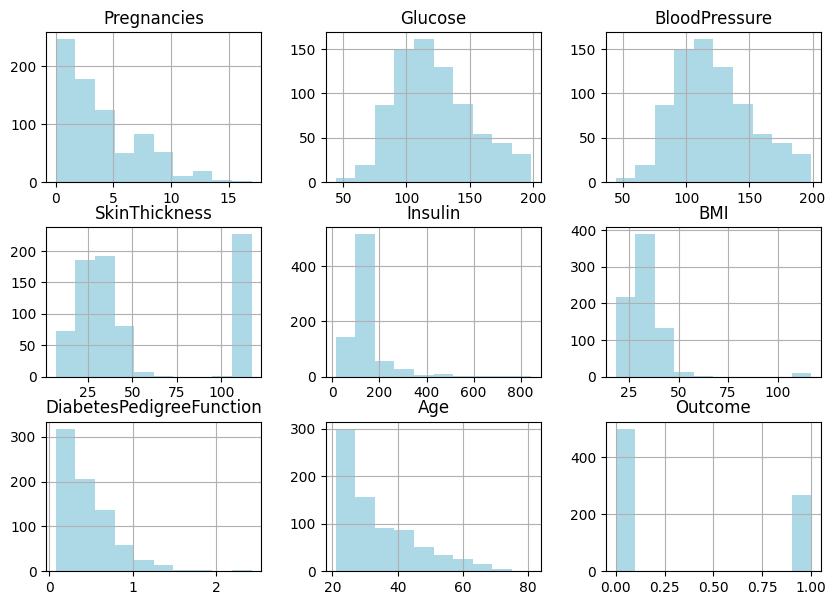

In [13]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

In [14]:
# Feature clipping right skewed features
# Define list of right skewed featutres
features = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Feature clip
for feature in features:
    lower_limit, upper_limit = np.percentile(df[feature], [1,95])
    df[feature] = np.clip(df[feature], lower_limit, upper_limit)



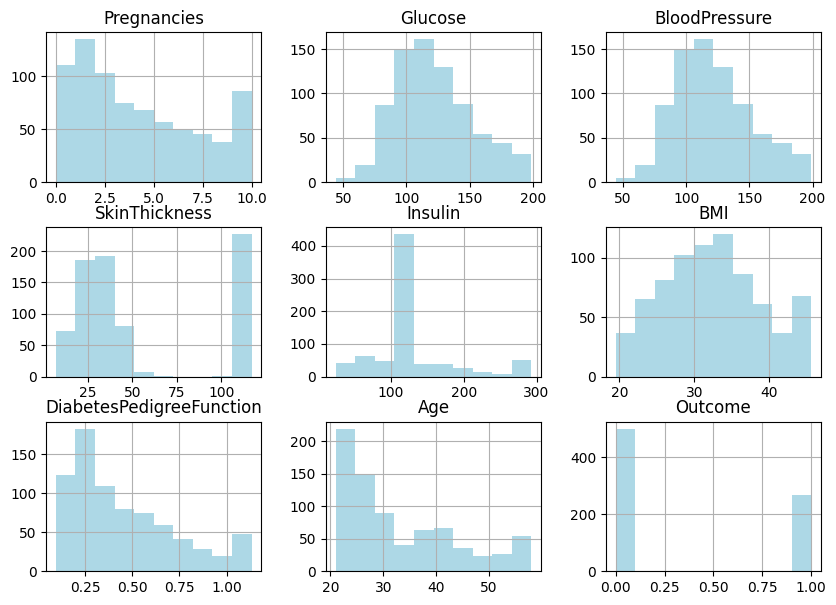

In [15]:
#histogram
df.hist(bins=10, figsize=(10,7), color='lightblue')
plt.show()

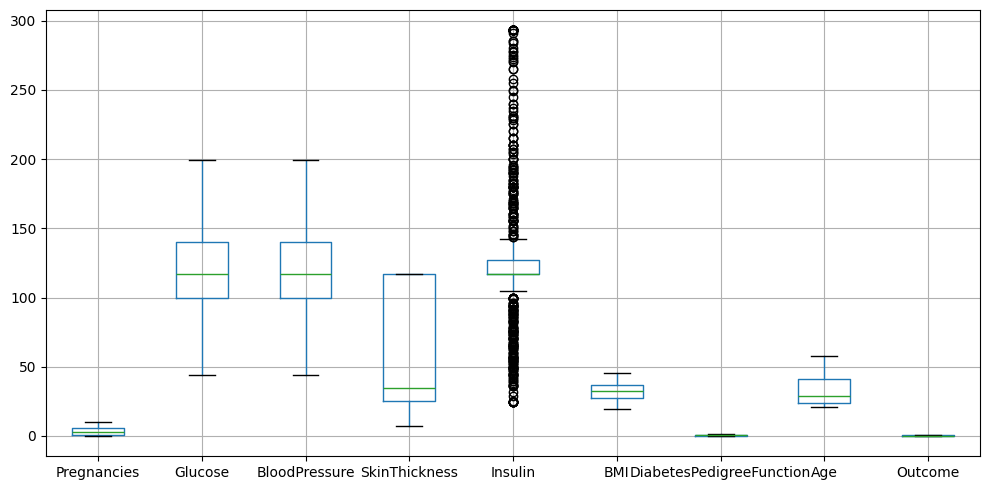

In [16]:
# Boxplot

df.boxplot(figsize=(10,5))
plt.tight_layout()
plt.show()

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.686763,121.686763,55.118490,129.498333,32.498177,0.456076,32.951823,0.348958
std,3.123898,30.435949,30.435949,41.062553,57.845239,6.627696,0.278126,11.006885,0.476951
min,0.000000,44.000000,44.000000,7.000000,24.340000,19.500000,0.094680,21.000000,0.000000
25%,1.000000,99.750000,99.750000,25.000000,117.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,117.000000,35.000000,117.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,140.250000,117.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,10.000000,199.000000,199.000000,117.000000,293.000000,45.600000,1.132850,58.000000,1.000000


In [18]:
# Counting the number of diabetic and non diabetic from the dataset
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

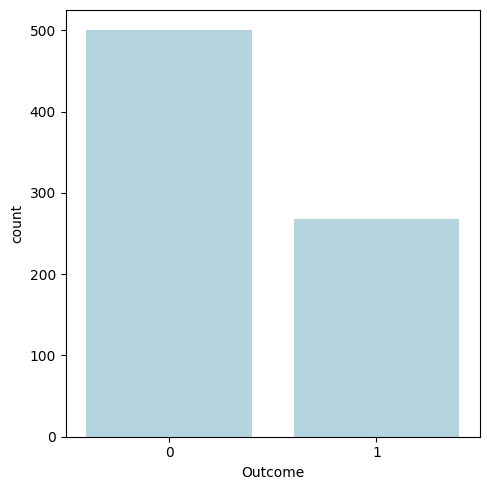

In [19]:
# Plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outcome', data = df, color='lightblue')
plt.tight_layout()
plt.show()

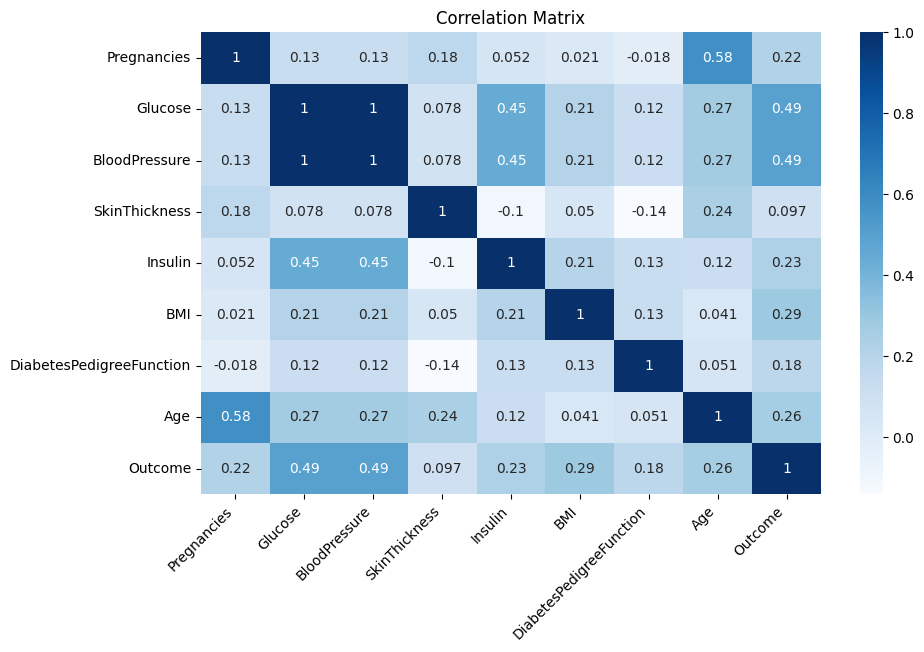

In [20]:
# Correlation matrix
plt.figure(figsize=(10,6))
corr_mat = df.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [62]:
# Store in outcome_correlations, the correlation of features with the Outcome variable
outcome_correlations = df.corr()["Outcome"].drop("Outcome").sort_values(ascending=False)

outcome_correlations

Glucose                     0.492928
BloodPressure               0.492928
BMI                         0.291430
Age                         0.260498
Insulin                     0.233390
Pregnancies                 0.219720
DiabetesPedigreeFunction    0.184303
SkinThickness               0.097476
Name: Outcome, dtype: float64

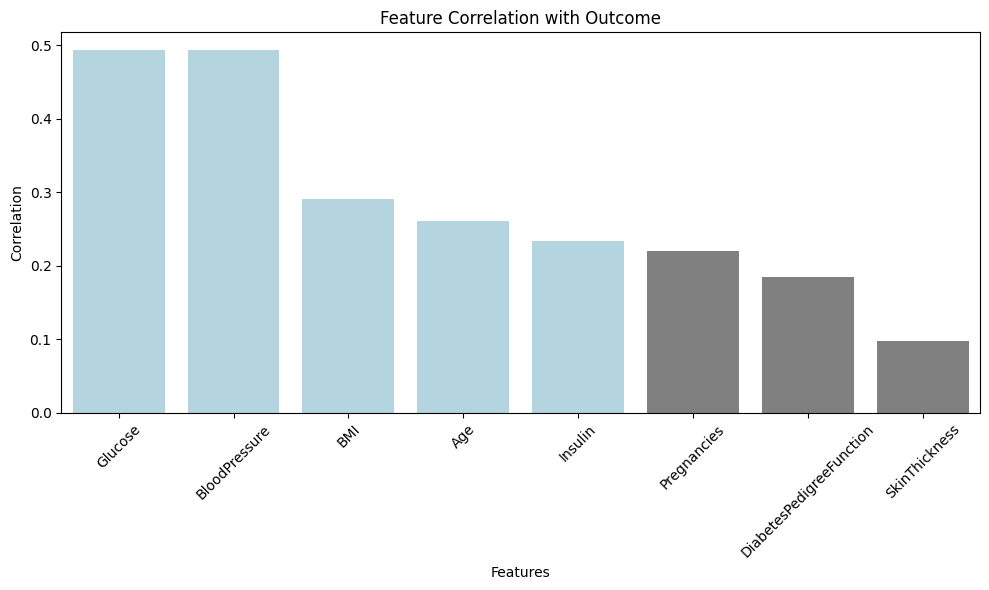

In [67]:
# Define custom colors for bars
custome_palette = ["grey" if x < 0.23 else "lightblue" for x in outcome_correlations]

# Visualize Correlation with Outcome
plt.figure(figsize=(10,6))
sns.barplot(x=outcome_correlations.index, y=outcome_correlations.values, hue=outcome_correlations.index, palette=custome_palette, legend=False)
plt.xticks(rotation=45)
plt.title("Feature Correlation with Outcome")
plt.ylabel("Correlation")
plt.xlabel("Features")

plt.tight_layout()
plt.show()

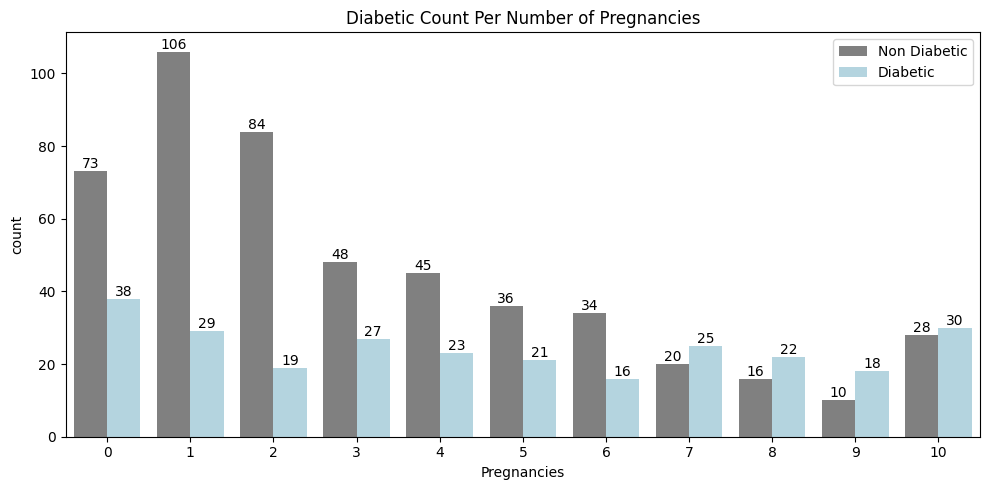

In [21]:
# Visualise diabetic count per number of pregnancies
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(ax=ax, data=df, x="Pregnancies", hue="Outcome", palette=["grey", "lightblue"])
ax.legend(['Non Diabetic', 'Diabetic'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Diabetic Count Per Number of Pregnancies')

plt.tight_layout()  
plt.show()

In [41]:
df.to_csv('diabetes_cleaned.csv', index=False)

# Artificial Neural Network

In [ ]:
# Define independent anf dependent variables


# Logisitic Regression

In [22]:
# Independent and dependent variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
# split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [25]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,134.0,134.0,23.0,130.0,35.4,0.542,29
346,1,139.0,139.0,19.0,83.0,28.7,0.654,22
511,0,139.0,139.0,17.0,210.0,22.1,0.207,21
121,6,111.0,111.0,39.0,117.0,34.2,0.260,24
241,4,91.0,91.0,32.0,88.0,33.1,0.446,22
...,...,...,...,...,...,...,...,...
403,9,72.0,72.0,25.0,117.0,31.6,0.280,38
88,10,136.0,136.0,32.0,110.0,37.1,0.153,43
310,6,80.0,80.0,30.0,117.0,26.2,0.313,41
555,7,124.0,124.0,33.0,215.0,25.5,0.161,37


In [26]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 0.69706452,  0.4407303 ,  0.4407303 , ...,  0.4324815 ,
         0.31315885, -0.37138906],
       [-0.89309541,  0.60657738,  0.60657738, ..., -0.58947121,
         0.71228377, -0.99939241],
       [-1.2111274 ,  0.60657738,  0.60657738, ..., -1.59617089,
        -0.88065233, -1.08910718],
       ...,
       [ 0.69706452, -1.35041815, -1.35041815, ..., -0.97079684,
        -0.50290909,  0.70518813],
       [ 1.01509651,  0.10903614,  0.10903614, ..., -1.07756802,
        -1.04457864,  0.34632907],
       [-1.2111274 ,  0.67291621,  0.67291621, ..., -0.02510926,
        -0.07527524, -0.99939241]])

In [28]:
""" # Can also try robust scaling or minmaxscaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) """

' # Can also try robust scaling or minmaxscaler\nsc = RobustScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test) '

In [29]:
X_train

array([[ 0.69706452,  0.4407303 ,  0.4407303 , ...,  0.4324815 ,
         0.31315885, -0.37138906],
       [-0.89309541,  0.60657738,  0.60657738, ..., -0.58947121,
         0.71228377, -0.99939241],
       [-1.2111274 ,  0.60657738,  0.60657738, ..., -1.59617089,
        -0.88065233, -1.08910718],
       ...,
       [ 0.69706452, -1.35041815, -1.35041815, ..., -0.97079684,
        -0.50290909,  0.70518813],
       [ 1.01509651,  0.10903614,  0.10903614, ..., -1.07756802,
        -1.04457864,  0.34632907],
       [-1.2111274 ,  0.67291621,  0.67291621, ..., -0.02510926,
        -0.07527524, -0.99939241]])

In [30]:
X_test

array([[ 0.69706452,  0.8719327 ,  0.8719327 , ..., -0.467447  ,
        -0.98399717,  1.51262101],
       [ 1.01509651,  0.70608563,  0.70608563, ..., -0.33016977,
        -1.16217795,  0.88461766],
       [-0.57506343, -0.05681094, -0.05681094, ..., -1.97749653,
         1.34660732,  2.23033913],
       ...,
       [ 0.37903254, -0.38850509, -0.38850509, ...,  0.4934936 ,
         0.21337761, -0.73024812],
       [ 1.3331285 , -0.02364152, -0.02364152, ..., -1.15383315,
        -0.16080201,  2.23033913],
       [-0.57506343,  1.80067634,  1.80067634, ..., -1.47414669,
        -0.45658209, -0.99939241]])

In [31]:
# Logisitic regression model
# Extentention of linear regression. converting output into 0,1 (for binary classfication)
# Linear relationshop between the features we are workign with.

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [32]:
# Predict on the test data
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
# Putting in a dataframe
df1 = pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred_log})
df1

,Actual_value,Predicted_value
642,1,1
695,1,0
453,0,0
565,0,0
99,1,0
...,...,...
455,1,1
354,0,0
216,1,0
509,0,0


In [34]:
accuracy_score(y_test, y_pred_log)

0.7835497835497836

In [35]:
# model evaluation 
# r2, mean absolute error, mean square error, root mean square error
# 0, 1
# mae must have a lower mae 0. 
# mse --o.
# rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_log)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_log)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_log)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_log))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.06462585034013602
Mean Absolute Error: 0.21645021645021645
Mean Square Error: 0.21645021645021645
Root Mean Square Error: 0.4652421051992354


In [36]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, y_pred_log)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_log)

print(accuracy_LR)
print(conf_mat)

0.7835497835497836
[[131  16]
 [ 34  50]]


In [37]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       147
           1       0.76      0.60      0.67        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [38]:
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)

AUC: 0.743197


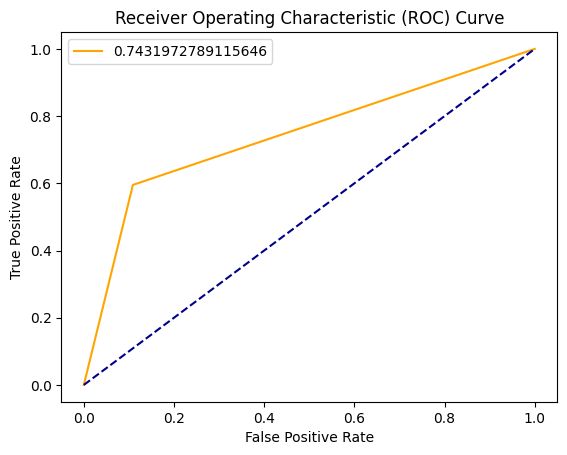

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred_log)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

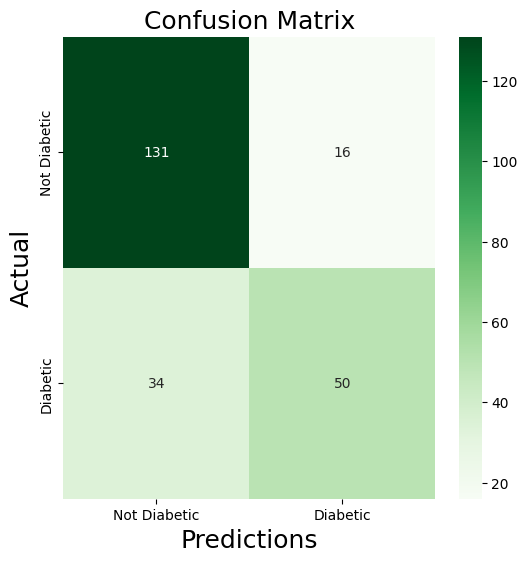

In [40]:
# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()